# Solving Muddy City using Kruskal's Algorithm

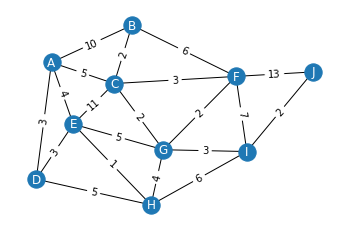

In [289]:
# Create the graph

import matplotlib.pyplot as plt
import networkx as nx

# Load nodes and edges
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"])

edges = [
    ("A", "B", {"weight": 10}),
    ("A", "C", {"weight": 5}),
    ("A", "D", {"weight": 3}),
    ("A", "E", {"weight": 4}),
    ("B", "C", {"weight": 2}),
    ("B", "F", {"weight": 6}),
    ("C", "E", {"weight": 11}),
    ("C", "F", {"weight": 3}),
    ("C", "G", {"weight": 2}),
    ("D", "E", {"weight": 3}),
    ("D", "H", {"weight": 5}),
    ("E", "G", {"weight": 5}),
    ("E", "H", {"weight": 1}),
    ("F", "G", {"weight": 2}),
    ("F", "I", {"weight": 7}),
    ("F", "J", {"weight": 13}),
    ("G", "H", {"weight": 4}),
    ("G", "I", {"weight": 3}),
    ("H", "I", {"weight": 6}),
    ("I", "J", {"weight": 2}),
]

G.add_edges_from(edges)
pos = nx.spring_layout(
    G, seed=74
)  # This locks in a deterministic layout, otherwise a random layout will be generated each time.
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, with_labels=True, font_color="white")
plt.show()


In [290]:
def kruskal(G):
    edges = sorted(G.edges(data=True), key=lambda t: t[2].get("weight", 1))
    nodes = list(G.nodes)
    mst = nx.Graph()
    mst.add_nodes_from(G)
    for e in edges:
        if e[0] not in nodes and e[1] not in nodes:
            continue  # skip if edge connects two explored nodes
        mst.add_edges_from([e])
        try:
            nx.find_cycle(mst)
            mst.remove_edge(e[0], e[1])
        except:
            if nx.is_connected(mst):
                break
            continue
    return mst


20


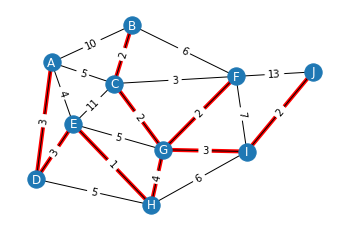

In [291]:
MST = kruskal(G).edges
nx.draw_networkx_edges(G, pos, list(MST), width=4, edge_color="red")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos, with_labels=True, font_color="white")
plt.show()
plt.show()
